# Estudo de caso CHURN (Machine Learning)
#### Executando na placa de vídeo(GPU)

### 1. Importando o Arquivo CSV:

In [2]:
import cudf #cria o dataframe na gpu

ModuleNotFoundError: ignored

In [ ]:
url = "https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv"

In [ ]:
dados_coletados = cudf.read_csv(url)

In [ ]:
dados_coletados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dados_coletados.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   RowNumber        10000 non-null  int64
 1   CustomerId       10000 non-null  int64
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64
 7   Tenure           10000 non-null  int64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64
 10  HasCrCard        10000 non-null  int64
 11  IsActiveMember   10000 non-null  int64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


sdfsdfd

### 2. Eliminando as colunas que não agregam valor aos dados:

In [ ]:
dados_uteis = dados_coletados.drop(columns = ['RowNumber','CustomerId','Surname'])
dados_uteis

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 3. Verificando valores nulos:

In [ ]:
dados_uteis.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 4. Elegendo a variável alvo:

In [ ]:
coluna_resposta = dados_uteis['Exited']

### 5. Identificando as variáveis categóricas e contínuas:

In [ ]:
lista_continuas=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
lista_continuas

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [ ]:
lista_categoricas = list(set(dados_uteis)-set(lista_continuas))
dados_categoricas=dados_uteis[lista_categoricas]
dados_categoricas

,Gender,Exited,NumOfProducts,IsActiveMember,HasCrCard,Geography
0,Female,1,1,1,1,France
1,Female,0,1,1,0,Spain
2,Female,1,3,0,1,France
3,Female,0,2,0,0,France
4,Female,0,1,1,1,Spain
...,...,...,...,...,...,...
9995,Male,0,2,0,1,France
9996,Male,0,1,1,1,France
9997,Female,1,1,1,0,France
9998,Male,1,2,0,1,Germany


### 6. Transformando variáveis dicotômicas(que possuem dois valores) não numéricas em numéricas (0 e 1)

In [ ]:
##Substituindo a variável sexo para 0 e 1
from cuml.preprocessing import LabelEncoder  #cuml é sklearn na gpu
le = LabelEncoder()
dados_uteis['Gender'] = le.fit_transform(dados_uteis['Gender']) 
dados_uteis.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### 7. Tranformando variáveis contínuas em números reais entre 0 e 1.

In [ ]:
from cuml.preprocessing import MinMaxScaler
dados_uteis[lista_continuas] = MinMaxScaler().fit_transform(dados_uteis[lista_continuas])
dados_uteis[lista_continuas]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


### 8. Eliminando a variável alvo(coluna "Exited")  da tabela de dados para aplicação de algoritmos supervisionados de Machine Learning.

In [ ]:
dados_independentes = dados_uteis.drop('Exited',axis = 1)

### 9. Redimensionando variáveis não contínuas que possuem mais de dois valores em novas variáveis (colunas) dicotômicas com valores 0 ou 1.

In [ ]:
dados_independentes = cudf.get_dummies (dados_independentes, columns=['Geography','NumOfProducts'] )
dados_independentes

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,1,0,0.481341,1,0,0,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,1,1,0.508490,1,0,0,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0,1,0.210390,1,0,0,1,0,0,0
9998,0.844,1,0.324324,0.3,0.299226,1,0,0.464429,0,1,0,0,1,0,0


### 10. Separando 25% dos dados para tabela de teste e 75% para tabela de treino do modelo.

In [ ]:
from cuml.model_selection import train_test_split

dados_treino, dados_teste, coluna_resposta_treino,coluna_resposta_teste  = train_test_split(dados_independentes, coluna_resposta, test_size = 0.25,random_state = 1)
dados_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
5757,0.662,1,0.189189,0.3,0.593406,1,1,0.454822,1,0,0,0,1,0,0
5041,0.434,1,0.148649,0.8,0.000000,1,0,0.780645,0,0,1,0,1,0,0
7667,0.894,1,0.148649,0.1,0.000000,0,1,0.749970,1,0,0,1,0,0,0
4455,0.668,0,0.175676,0.8,0.000000,1,0,0.943217,0,0,1,0,1,0,0
7611,0.802,1,0.270270,0.7,0.000000,0,0,0.454184,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0.454,1,0.337838,0.6,0.000000,1,1,0.747303,0,0,1,0,1,0,0
8641,0.508,0,0.391892,0.4,0.473928,0,1,0.238851,0,1,0,1,0,0,0
2105,0.284,0,0.175676,0.7,0.000000,1,1,0.247283,1,0,0,0,1,0,0
9656,0.692,1,0.189189,0.4,0.336478,0,1,0.261541,0,1,0,1,0,0,0


### 11. Encontrando o melhor valor para o parâmetro "número de vizinhos" para o KNN

In [ ]:
import numpy as np #manipulação algebricas
import cupy as cp #cupy é numpy na gpu
from cuml.neighbors import KNeighborsClassifier
import time

# Inicializando variáveis
inicio = time.time()
lista_erro_medio = []
menor_media_erro = 1
melhor_k = 2
for i in range(2, 40):
  robo_treinado_por_knn_cuml = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=i, p=2,
                 weights='uniform').fit(dados_treino, coluna_resposta_treino)
  
  previsao = robo_treinado_por_knn_cuml.predict(dados_teste)
  # é preciso converter cudf para cupy
  media_erro_atual = cp.mean(previsao.to_cupy() != coluna_resposta_teste.to_cupy())
  
        
  lista_erro_medio.append(float(media_erro_atual))
 

  if media_erro_atual < menor_media_erro:
      menor_media_erro = media_erro_atual
      melhor_k = i

print("Tempo de execução: " ,time.time() - inicio)       
print (f"O melhor valor para i é: {melhor_k} que produz erro igual a : {menor_media_erro} ")

#Conclusões:
#PARA TABELAS PEQUENAS COMO DADOS_TREINO O CUML FICA MAIS LENTO QUE O SKLEARN
#.PREDICT(PREVER) É MAIS DEMORADO DO QUE .FIT(TREINAR)

Tempo de execução:  12.225098371505737
O melhor valor para i é: 9 que produz erro igual a : 0.1636 


### 12.Treinando o modelo de Machine Learning utilizando o algoritmo KNN

In [ ]:

#Treinando o modelo a partir dos dados de treino e respectiva coluna resposta
robo_treinado_por_knn = KNeighborsClassifier(n_neighbors=17).fit(dados_treino, coluna_resposta_treino)

#Gerando uma coluna resposta a partir da aplicação do modelo aos dados de teste (previsão)
coluna_resposta_previsao = robo_treinado_por_knn.predict(dados_teste)

#Confrontando a coluna reposta real com a coluna resposta previsão:
import pandas as pd
print (pd.crosstab(coluna_resposta_teste.to_pandas(),coluna_resposta_previsao.to_pandas(), rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))
#Calculando a acurácia
n_correct = len(dados_teste.loc[coluna_resposta_teste==coluna_resposta_previsao])
n_possible = len(dados_teste)
print(f'\n{n_correct} / {n_possible} correct\n{str(n_correct / n_possible * 100)[:5]}% accuracy')

Previsão      0    1  Total
Realidade                  
0          1927   84   2011
1           329  160    489
Total      2256  244   2500

2087 / 2500 correct
83.48% accuracy


Text(0, 0.5, 'Erro Médio')

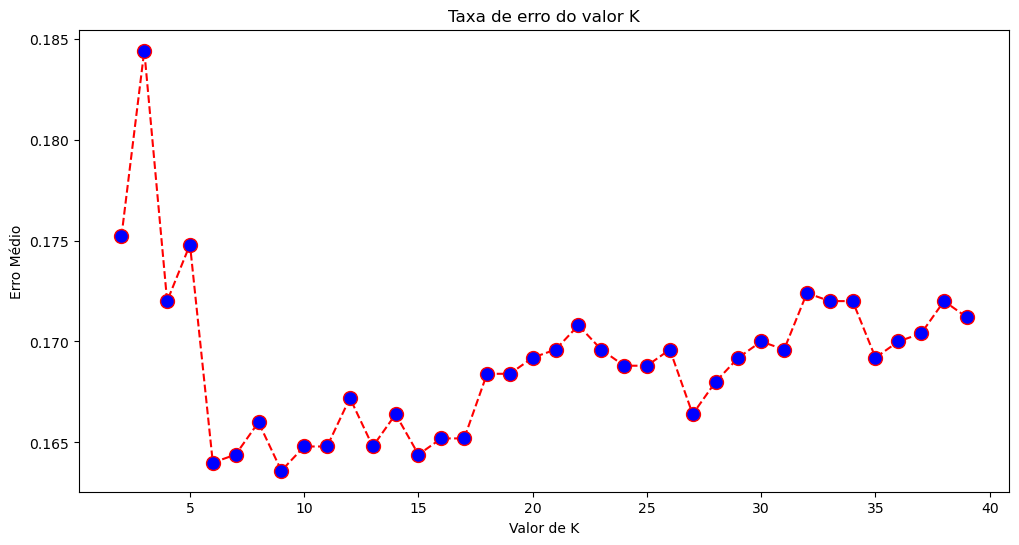

In [ ]:
#imprime gráfico de (k x erro_médio)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), lista_erro_medio, color='red', linestyle='dashed', marker='o', #range deve ser igual ao da lista
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

### 13. Implementando o algoritmo Random Forest Classifier:

In [ ]:
from cuml import RandomForestClassifier

# Treinando o modelo por Random Forest Classifier:
robo_treinado_por_rf = RandomForestClassifier (n_streams=1, n_estimators = 1000, random_state = 42).fit (dados_treino, coluna_resposta_treino)
# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_rf.predict(dados_teste)
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste.to_pandas(),coluna_resposta_previsao.to_pandas(), rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

/home/mhmatsumura/miniconda3/envs/rapids-22.08/lib/python3.9/site-packages/cuml/internals/api_decorators.py:567: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret_val = func(*args, **kwargs)


Previsão    0.0  1.0  Total
Realidade                  
0          1937   74   2011
1           263  226    489
Total      2200  300   2500


### 14. Verificando as métricas de classificação:

In [ ]:
#Verificando as métricas de classificação
from sklearn.metrics import classification_report
print(classification_report(coluna_resposta_teste.to_pandas(), coluna_resposta_previsao.to_pandas()))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2011
           1       0.75      0.46      0.57       489

    accuracy                           0.87      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



### 16. Implementando o algoritmo Voting Classifier :
##### Combinando o algoritmo random forest com o xgb

In [1]:
from sklearn.ensemble import VotingClassifier #aqui o votingclassifier é do SKLEARN porém irá combinar dois algoritmos do CUML na GPU (100x) mais rápido

#inicializando treinadores
robo_treinador_rf = RandomForestClassifier (n_streams=1, n_estimators = 1000, random_state = 42)
robo_treinador_knn = KNeighborsClassifier(n_neighbors=17)
# Treinando o modelo por Voting classifer (combina dois modelos para obter mais performance)
robo_treinado_por_voto = VotingClassifier(estimators=[('rf', robo_treinador_rf),('knn',robo_treinador_knn)], voting='soft').fit(dados_treino.to_pandas(), coluna_resposta_treino.to_pandas())
# aplicando o modelo treinado(predição):
coluna_resposta_previsao = robo_treinado_por_voto.predict(dados_teste.to_pandas())
# confrontando valores reais com os preditos:
print (pd.crosstab(coluna_resposta_teste.to_pandas(),coluna_resposta_previsao, rownames=['Realidade'], colnames=['Previsão'], margins=True, margins_name="Total"))

NameError: ignored

In [ ]:
#Verificando o desempenho
print(classification_report(coluna_resposta_teste.to_pandas(), coluna_resposta_previsao))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2011
           1       0.75      0.40      0.53       489

    accuracy                           0.86      2500
   macro avg       0.81      0.69      0.72      2500
weighted avg       0.85      0.86      0.84      2500



### 17. Gerando a coluna de probabilidade da classe 1 ocorrer:

In [ ]:
#[:,1] imprime apenas a classe 1, [:,0] imprime apenas a classe 0
dados_coletados['proba'] = robo_treinado_por_voto.predict_proba(dados_independentes.to_pandas())[:,1]
dados_coletados[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.357345
1,15647311,0.217303
2,15619304,0.943631
3,15701354,0.060519
4,15737888,0.210217
...,...,...
9995,15606229,0.010879
9996,15569892,0.096961
9997,15584532,0.303842
9998,15682355,0.362933
